# Markov Chains Algorithm

## Build latency, generation latency

In [64]:
#packages
import pandas as pd
import numpy as np
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import ttest_ind
from scipy.stats import linregress
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
def descriptive_stats(dataframe, div = 1.0, roundDec = 3):
    stats = (dataframe.describe(include='all').transpose().filter (['min', '50%','mean', 'max', 'std']).set_axis(['Min.', 'Median', 'Mean', 'Max.', 'Std. Dev.'], axis = 1) / div).round(roundDec)
    print(stats.to_latex())

def processData(frametime_update_task, xlabel, ylabel, figfile):
    print("SIZE: " + str(frametime_update_task.shape[0]))
    
    descriptive_stats(frametime_update_task)

    boxdata = frametime_update_task.transpose().values.tolist()
    fig, ax = plt.subplots()
    ax.boxplot(boxdata)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(figfile)
    plt.show()

    d1, d2, d3, d4, d5, d6, d7, d8 = x = frametime_update_task.transpose().values.tolist()
    levene_result = levene(d1, d2, d3, d4, d5, d6, d7, d8)
    print("levene:\n" + str(levene_result))
    if levene_result[1] < 0.05:
        anova_result = kruskal(d1, d2, d3, d4, d5, d6, d7, d8)
    else:
        anova_result = f_oneway(d1, d2, d3, d4, d5, d6, d7, d8)
    print("Anova or kruskal:\n" + str(anova_result))
    
def mean_std_process(data, ylabelmean, ylabelstd, figfile):
    #Means and Std
    colors = plt.rcParams["axes.prop_cycle"]()
    means = np.mean(data.transpose().values, axis = 1)
    stds = np.std(data.transpose().values, axis = 1)
    agentsize = np.arange(1,9,1)
    plt.figure()
    fig, axs = plt.subplots(1, 2, figsize=(12,5))
    axs[0].plot(agentsize, means, color = next(colors)["color"])
    axs[0].set_title('a) Mean')
    axs[0].set_xlabel('Agent Size')
    axs[0].set_ylabel(ylabelmean)
    axs[1].plot(agentsize, stds, color = next(colors)["color"])
    axs[1].set_title('a) Standard Deviation')
    axs[1].set_xlabel('Agent Size')
    axs[1].set_ylabel(ylabelstd)
    plt.savefig(figfile)
    plt.show()

def extractGroup(data_collection, name):    
    headers = []
    for i in range(8):
        headers.append(name + str(i+1))
    data = []
    for i in range(8):
        data_collection[i][name].name =str(i+1)
        data.append(data_collection[i][name])   
    return pd.concat(data, axis = 1)


## Build Latency - Put the 30 in Appendice, refers just 1 to justifu the variation


*************** BUILD FOR 100********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  0.628 &   0.644 &  0.805 &  1.184 &      0.241 \\
agent\_ms\_2 &  0.437 &   1.102 &  0.812 &  1.219 &      0.351 \\
agent\_ms\_3 &  0.688 &   0.702 &  0.781 &  1.263 &      0.184 \\
agent\_ms\_4 &  0.397 &   0.422 &  0.578 &  0.811 &      0.189 \\
agent\_ms\_5 &  0.616 &   0.632 &  0.644 &  0.844 &      0.042 \\
agent\_ms\_6 &  0.415 &   0.421 &  0.547 &  1.139 &      0.249 \\
agent\_ms\_7 &  0.486 &   0.496 &  0.589 &  1.183 &      0.227 \\
agent\_ms\_8 &  0.291 &   0.298 &  0.438 &  0.786 &      0.219 \\
\bottomrule
\end{tabular}



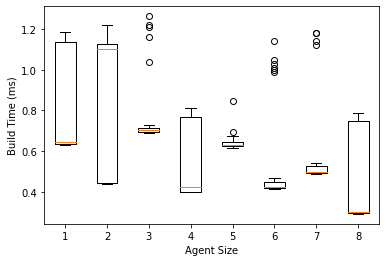

levene:
LeveneResult(statistic=4.99695170931407, pvalue=2.733103455927345e-05)
Anova or kruskal:
KruskalResult(statistic=65.69956443242953, pvalue=1.0878056612510449e-11)

*************** BUILD FOR 200********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  0.543 &   0.548 &  0.749 &  1.358 &      0.342 \\
agent\_ms\_2 &  0.412 &   0.895 &  0.705 &  0.988 &      0.245 \\
agent\_ms\_3 &  0.595 &   0.600 &  0.695 &  1.437 &      0.253 \\
agent\_ms\_4 &  0.498 &   0.800 &  0.683 &  0.827 &      0.148 \\
agent\_ms\_5 &  0.509 &   0.513 &  0.563 &  1.259 &      0.188 \\
agent\_ms\_6 &  0.409 &   0.419 &  0.586 &  0.887 &      0.218 \\
agent\_ms\_7 &  0.411 &   0.417 &  0.577 &  1.044 &      0.262 \\
agent\_ms\_8 &  0.403 &   0.602 &  0.579 &  0.895 &      0.116 \\
\bottomrule
\end{tabular}



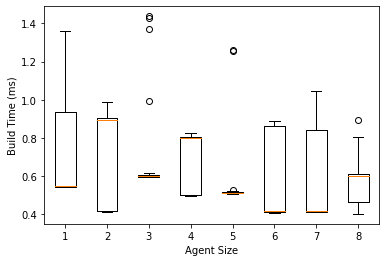

levene:
LeveneResult(statistic=2.037272107999503, pvalue=0.05140074345765248)
Anova or kruskal:
F_onewayResult(statistic=2.99904990439769, pvalue=0.004934721201834903)

*************** BUILD FOR 300********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  0.625 &   0.682 &  0.736 &  1.012 &      0.097 \\
agent\_ms\_2 &  0.616 &   0.635 &  0.636 &  0.672 &      0.010 \\
agent\_ms\_3 &  0.647 &   0.652 &  0.723 &  0.941 &      0.114 \\
agent\_ms\_4 &  0.740 &   0.776 &  0.780 &  0.817 &      0.019 \\
agent\_ms\_5 &  0.620 &   0.641 &  0.696 &  0.851 &      0.079 \\
agent\_ms\_6 &  0.612 &   0.628 &  0.640 &  0.709 &      0.028 \\
agent\_ms\_7 &  0.604 &   0.629 &  0.631 &  0.665 &      0.010 \\
agent\_ms\_8 &  0.609 &   0.642 &  0.669 &  0.854 &      0.072 \\
\bottomrule
\end{tabular}



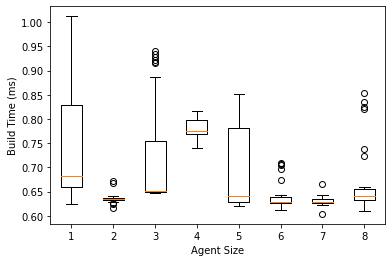

levene:
LeveneResult(statistic=8.213372127734479, pvalue=6.094788976724469e-09)
Anova or kruskal:
KruskalResult(statistic=112.42559667922954, pvalue=2.8807048892468188e-21)

*************** BUILD FOR 400********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  0.846 &   0.944 &  0.962 &  1.109 &      0.083 \\
agent\_ms\_2 &  0.837 &   0.849 &  0.851 &  0.906 &      0.013 \\
agent\_ms\_3 &  0.829 &   0.872 &  0.882 &  0.965 &      0.029 \\
agent\_ms\_4 &  1.036 &   1.058 &  1.074 &  1.179 &      0.035 \\
agent\_ms\_5 &  0.827 &   0.832 &  0.863 &  1.025 &      0.053 \\
agent\_ms\_6 &  0.819 &   0.864 &  0.873 &  0.960 &      0.033 \\
agent\_ms\_7 &  0.805 &   0.838 &  0.847 &  0.930 &      0.026 \\
agent\_ms\_8 &  0.818 &   0.853 &  0.871 &  0.996 &      0.041 \\
\bottomrule
\end{tabular}



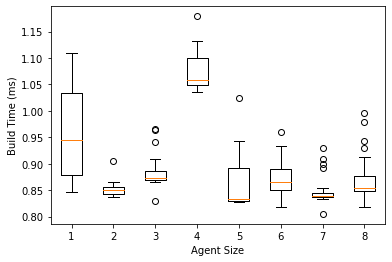

levene:
LeveneResult(statistic=13.906114803232395, pvalue=5.059192657999427e-15)
Anova or kruskal:
KruskalResult(statistic=141.91685136677197, pvalue=2.015733722352639e-27)

*************** BUILD FOR 500********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  1.071 &   1.240 &  1.195 &  1.437 &      0.119 \\
agent\_ms\_2 &  1.033 &   1.075 &  1.079 &  1.199 &      0.035 \\
agent\_ms\_3 &  1.054 &   1.098 &  1.101 &  1.147 &      0.015 \\
agent\_ms\_4 &  1.246 &   1.300 &  1.306 &  1.414 &      0.032 \\
agent\_ms\_5 &  1.000 &   1.044 &  1.049 &  1.112 &      0.020 \\
agent\_ms\_6 &  1.017 &   1.067 &  1.082 &  1.398 &      0.066 \\
agent\_ms\_7 &  1.001 &   1.049 &  1.057 &  1.119 &      0.024 \\
agent\_ms\_8 &  1.003 &   1.062 &  1.066 &  1.169 &      0.027 \\
\bottomrule
\end{tabular}



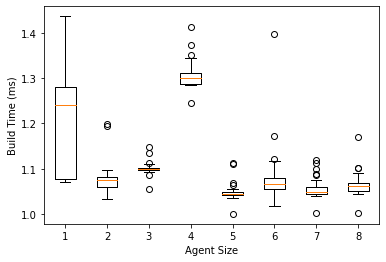

levene:
LeveneResult(statistic=23.277766538014653, pvalue=8.058527622680991e-24)
Anova or kruskal:
KruskalResult(statistic=154.55379469712219, pvalue=4.48447019631948e-30)

*************** BUILD FOR 600********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  1.280 &   1.289 &  1.383 &  1.676 &      0.142 \\
agent\_ms\_2 &  1.244 &   1.308 &  1.335 &  1.454 &      0.058 \\
agent\_ms\_3 &  1.274 &   1.324 &  1.343 &  1.471 &      0.049 \\
agent\_ms\_4 &  1.506 &   1.574 &  1.574 &  1.648 &      0.027 \\
agent\_ms\_5 &  1.204 &   1.259 &  1.261 &  1.325 &      0.017 \\
agent\_ms\_6 &  1.258 &   1.299 &  1.313 &  1.699 &      0.080 \\
agent\_ms\_7 &  1.217 &   1.666 &  1.548 &  1.730 &      0.197 \\
agent\_ms\_8 &  1.237 &   1.292 &  1.310 &  1.466 &      0.053 \\
\bottomrule
\end{tabular}



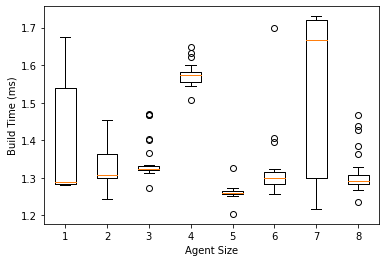

levene:
LeveneResult(statistic=12.808750024694657, pvalue=6.78114410357036e-14)
Anova or kruskal:
KruskalResult(statistic=129.7462255367978, pvalue=7.1014644487297705e-25)

*************** BUILD FOR 700********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  1.501 &   1.509 &  1.532 &  1.802 &      0.068 \\
agent\_ms\_2 &  1.460 &   1.519 &  1.547 &  1.800 &      0.073 \\
agent\_ms\_3 &  1.464 &   1.536 &  1.538 &  1.615 &      0.022 \\
agent\_ms\_4 &  1.766 &   1.844 &  1.876 &  2.782 &      0.174 \\
agent\_ms\_5 &  1.393 &   1.466 &  1.473 &  1.572 &      0.030 \\
agent\_ms\_6 &  1.421 &   1.493 &  1.506 &  1.606 &      0.046 \\
agent\_ms\_7 &  1.448 &   1.516 &  1.527 &  1.643 &      0.037 \\
agent\_ms\_8 &  1.442 &   1.490 &  1.499 &  1.616 &      0.030 \\
\bottomrule
\end{tabular}



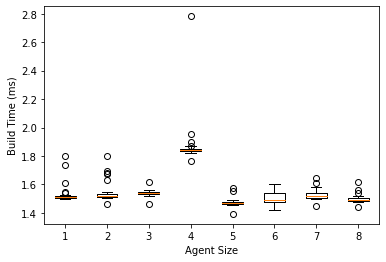

levene:
LeveneResult(statistic=0.8946447649055114, pvalue=0.5113701709265844)
Anova or kruskal:
F_onewayResult(statistic=87.00624568379209, pvalue=2.670380621698784e-61)

*************** BUILD FOR 800********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  1.643 &   1.710 &  1.714 &  1.815 &      0.025 \\
agent\_ms\_2 &  1.655 &   1.745 &  1.805 &  2.095 &      0.111 \\
agent\_ms\_3 &  1.685 &   1.748 &  1.789 &  2.178 &      0.096 \\
agent\_ms\_4 &  1.991 &   2.086 &  2.096 &  2.355 &      0.060 \\
agent\_ms\_5 &  1.599 &   1.681 &  1.694 &  1.827 &      0.039 \\
agent\_ms\_6 &  1.646 &   1.721 &  1.733 &  1.826 &      0.040 \\
agent\_ms\_7 &  1.630 &   1.708 &  1.726 &  1.948 &      0.058 \\
agent\_ms\_8 &  1.621 &   1.728 &  1.742 &  1.937 &      0.058 \\
\bottomrule
\end{tabular}



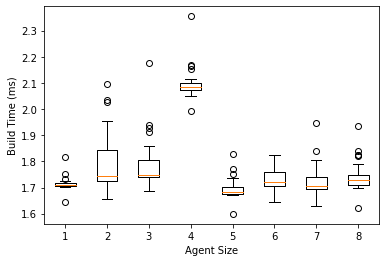

levene:
LeveneResult(statistic=3.9148230932957455, pvalue=0.00046806753754815954)
Anova or kruskal:
KruskalResult(statistic=135.29351653055068, pvalue=4.915114503041828e-26)

*************** BUILD FOR 900********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  1.853 &   1.938 &  1.942 &  2.048 &      0.030 \\
agent\_ms\_2 &  1.973 &   2.636 &  2.553 &  2.830 &      0.212 \\
agent\_ms\_3 &  1.865 &   1.967 &  1.975 &  2.105 &      0.039 \\
agent\_ms\_4 &  2.341 &   2.375 &  2.380 &  2.489 &      0.033 \\
agent\_ms\_5 &  1.805 &   1.886 &  1.901 &  2.020 &      0.042 \\
agent\_ms\_6 &  1.810 &   1.932 &  1.944 &  2.083 &      0.058 \\
agent\_ms\_7 &  1.855 &   1.928 &  1.958 &  2.228 &      0.076 \\
agent\_ms\_8 &  1.861 &   1.934 &  1.946 &  2.061 &      0.052 \\
\bottomrule
\end{tabular}



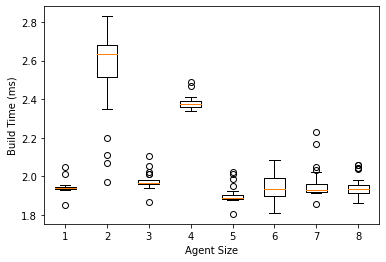

levene:
LeveneResult(statistic=8.416246561367114, pvalue=3.6198938411588347e-09)
Anova or kruskal:
KruskalResult(statistic=162.11513741702362, pvalue=1.1507659487535546e-31)

*************** BUILD FOR 1000********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  2.063 &   2.151 &  2.172 &  2.801 &      0.120 \\
agent\_ms\_2 &  2.111 &   2.241 &  2.261 &  2.514 &      0.091 \\
agent\_ms\_3 &  2.084 &   2.198 &  2.207 &  2.341 &      0.046 \\
agent\_ms\_4 &  2.474 &   2.624 &  2.653 &  2.942 &      0.101 \\
agent\_ms\_5 &  2.008 &   2.124 &  2.134 &  2.318 &      0.048 \\
agent\_ms\_6 &  2.021 &   2.144 &  2.152 &  2.404 &      0.070 \\
agent\_ms\_7 &  2.040 &   2.152 &  2.173 &  2.545 &      0.094 \\
agent\_ms\_8 &  2.100 &   2.171 &  2.187 &  2.386 &      0.062 \\
\bottomrule
\end{tabular}



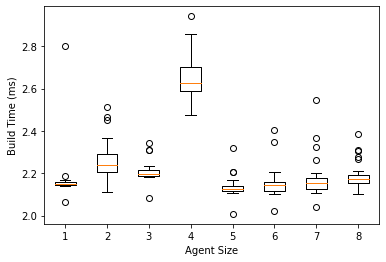

levene:
LeveneResult(statistic=1.889670688979068, pvalue=0.07206240176580139)
Anova or kruskal:
F_onewayResult(statistic=126.64413881292288, pvalue=1.4463567089367487e-75)

*************** BUILD FOR 1100********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  2.654 &   2.786 &  2.790 &  2.933 &      0.045 \\
agent\_ms\_2 &  2.368 &   2.494 &  2.501 &  2.701 &      0.073 \\
agent\_ms\_3 &  2.297 &   2.412 &  2.425 &  2.575 &      0.048 \\
agent\_ms\_4 &  2.770 &   2.884 &  2.932 &  3.283 &      0.123 \\
agent\_ms\_5 &  2.238 &   2.337 &  2.402 &  2.686 &      0.129 \\
agent\_ms\_6 &  2.255 &   2.349 &  2.374 &  2.624 &      0.075 \\
agent\_ms\_7 &  2.238 &   2.356 &  2.381 &  2.683 &      0.091 \\
agent\_ms\_8 &  2.259 &   2.380 &  2.393 &  2.717 &      0.080 \\
\bottomrule
\end{tabular}



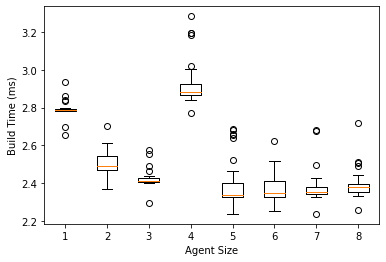

levene:
LeveneResult(statistic=2.2750799929300793, pvalue=0.029377555013962036)
Anova or kruskal:
KruskalResult(statistic=168.43940287057697, pvalue=5.354695243362308e-33)

*************** BUILD FOR 1200********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  2.591 &   3.050 &  3.047 &  3.215 &      0.097 \\
agent\_ms\_2 &  2.603 &   2.694 &  2.725 &  3.017 &      0.105 \\
agent\_ms\_3 &  2.491 &   2.626 &  2.640 &  2.904 &      0.067 \\
agent\_ms\_4 &  2.975 &   3.125 &  3.134 &  3.284 &      0.055 \\
agent\_ms\_5 &  2.391 &   2.524 &  2.547 &  2.763 &      0.074 \\
agent\_ms\_6 &  2.475 &   2.592 &  2.609 &  3.011 &      0.095 \\
agent\_ms\_7 &  2.430 &   2.570 &  2.624 &  2.986 &      0.125 \\
agent\_ms\_8 &  2.468 &   2.603 &  2.616 &  2.769 &      0.073 \\
\bottomrule
\end{tabular}



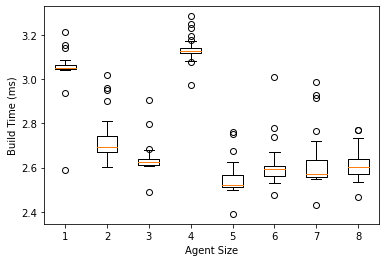

levene:
LeveneResult(statistic=1.1906687639633151, pvalue=0.308873844425511)
Anova or kruskal:
F_onewayResult(statistic=185.6066038124938, pvalue=2.5731509742394875e-91)

*************** BUILD FOR 1300********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  2.788 &   3.292 &  3.289 &  3.689 &      0.171 \\
agent\_ms\_2 &  2.787 &   2.853 &  2.903 &  3.144 &      0.128 \\
agent\_ms\_3 &  2.717 &   2.861 &  2.860 &  2.912 &      0.032 \\
agent\_ms\_4 &  3.246 &   3.394 &  3.432 &  3.744 &      0.108 \\
agent\_ms\_5 &  2.602 &   2.754 &  2.789 &  3.241 &      0.117 \\
agent\_ms\_6 &  2.635 &   3.084 &  3.104 &  3.475 &      0.204 \\
agent\_ms\_7 &  2.642 &   2.812 &  2.857 &  3.290 &      0.128 \\
agent\_ms\_8 &  2.643 &   2.800 &  2.835 &  3.108 &      0.096 \\
\bottomrule
\end{tabular}



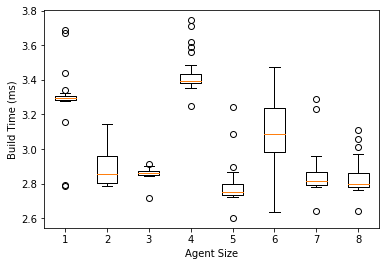

levene:
LeveneResult(statistic=4.673602083153001, pvalue=6.405203711026893e-05)
Anova or kruskal:
KruskalResult(statistic=160.09776670353264, pvalue=3.0593383453284723e-31)

*************** BUILD FOR 1400********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  3.006 &   3.559 &  3.559 &  4.000 &      0.211 \\
agent\_ms\_2 &  2.879 &   3.024 &  3.058 &  3.306 &      0.084 \\
agent\_ms\_3 &  2.949 &   3.093 &  3.115 &  3.277 &      0.062 \\
agent\_ms\_4 &  3.486 &   3.700 &  3.707 &  3.921 &      0.087 \\
agent\_ms\_5 &  2.888 &   3.022 &  3.039 &  3.268 &      0.087 \\
agent\_ms\_6 &  2.976 &   3.117 &  3.185 &  4.048 &      0.237 \\
agent\_ms\_7 &  2.955 &   3.052 &  3.079 &  3.434 &      0.095 \\
agent\_ms\_8 &  2.836 &   3.069 &  3.075 &  3.229 &      0.080 \\
\bottomrule
\end{tabular}



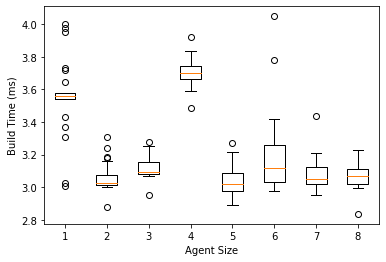

levene:
LeveneResult(statistic=3.7065321482608735, pvalue=0.0008045192288819523)
Anova or kruskal:
KruskalResult(statistic=134.66902696428852, pvalue=6.64035967312925e-26)

*************** BUILD FOR 1500********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &    Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  3.220 &   3.818 &  3.643 &   4.411 &      0.348 \\
agent\_ms\_2 &  3.126 &   3.297 &  3.307 &   3.520 &      0.072 \\
agent\_ms\_3 &  3.131 &   3.298 &  3.351 &   3.688 &      0.139 \\
agent\_ms\_4 &  3.753 &   4.080 &  4.123 &   4.637 &      0.172 \\
agent\_ms\_5 &  3.004 &   3.214 &  3.236 &   3.566 &      0.110 \\
agent\_ms\_6 &  3.190 &   3.288 &  4.350 &  11.667 &      2.538 \\
agent\_ms\_7 &  3.125 &   3.289 &  3.305 &   3.665 &      0.110 \\
agent\_ms\_8 &  3.106 &   3.303 &  3.315 &   3.539 &      0.096 \\
\bottomrule
\end{tabular}



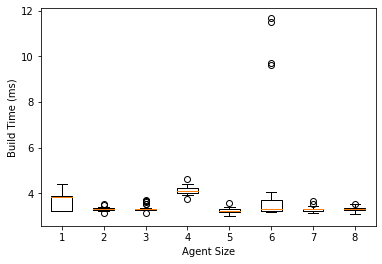

levene:
LeveneResult(statistic=4.943876823869645, pvalue=3.143415339740338e-05)
Anova or kruskal:
KruskalResult(statistic=93.87019447141593, pvalue=1.9804357774108578e-17)

*************** BUILD FOR 1600********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  3.405 &   3.955 &  3.794 &  4.387 &      0.344 \\
agent\_ms\_2 &  3.289 &   3.456 &  3.511 &  3.995 &      0.146 \\
agent\_ms\_3 &  3.336 &   3.513 &  3.547 &  3.977 &      0.106 \\
agent\_ms\_4 &  3.970 &   4.146 &  4.160 &  4.358 &      0.085 \\
agent\_ms\_5 &  3.210 &   3.390 &  3.416 &  3.661 &      0.082 \\
agent\_ms\_6 &  3.278 &   3.511 &  3.536 &  3.819 &      0.111 \\
agent\_ms\_7 &  3.223 &   3.425 &  3.466 &  3.771 &      0.123 \\
agent\_ms\_8 &  3.248 &   3.484 &  3.504 &  3.695 &      0.096 \\
\bottomrule
\end{tabular}



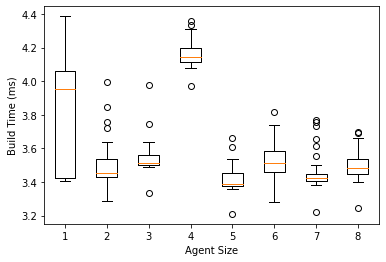

levene:
LeveneResult(statistic=18.03014665008495, pvalue=4.537437916623282e-19)
Anova or kruskal:
KruskalResult(statistic=115.83209200926201, pvalue=5.644486326761712e-22)

*************** BUILD FOR 1700********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  3.640 &   3.670 &  3.842 &  4.587 &      0.316 \\
agent\_ms\_2 &  3.495 &   3.672 &  3.724 &  4.188 &      0.139 \\
agent\_ms\_3 &  3.551 &   3.757 &  3.772 &  4.005 &      0.073 \\
agent\_ms\_4 &  4.191 &   4.427 &  4.437 &  4.677 &      0.097 \\
agent\_ms\_5 &  3.448 &   3.638 &  3.654 &  3.846 &      0.074 \\
agent\_ms\_6 &  3.439 &   3.691 &  3.714 &  4.111 &      0.120 \\
agent\_ms\_7 &  3.596 &   4.768 &  4.492 &  5.254 &      0.594 \\
agent\_ms\_8 &  3.515 &   3.705 &  3.747 &  4.317 &      0.149 \\
\bottomrule
\end{tabular}



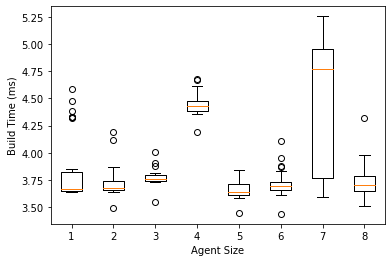

levene:
LeveneResult(statistic=15.605651003330157, pvalue=1.0014216847254452e-16)
Anova or kruskal:
KruskalResult(statistic=108.11256649795213, pvalue=2.26133890866996e-20)

*************** BUILD FOR 1800********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  4.021 &   4.564 &  4.602 &  5.077 &      0.186 \\
agent\_ms\_2 &  3.691 &   3.892 &  3.938 &  4.365 &      0.136 \\
agent\_ms\_3 &  3.841 &   3.971 &  4.005 &  4.628 &      0.132 \\
agent\_ms\_4 &  4.390 &   4.679 &  4.706 &  5.185 &      0.127 \\
agent\_ms\_5 &  3.618 &   3.848 &  3.873 &  4.177 &      0.102 \\
agent\_ms\_6 &  3.644 &   3.890 &  3.934 &  4.342 &      0.132 \\
agent\_ms\_7 &  3.729 &   3.891 &  3.943 &  4.454 &      0.165 \\
agent\_ms\_8 &  3.810 &   3.982 &  4.010 &  4.353 &      0.124 \\
\bottomrule
\end{tabular}



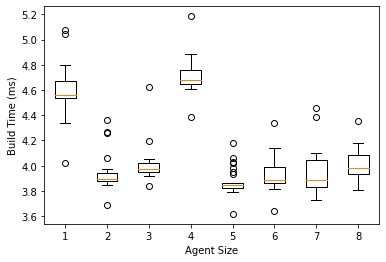

levene:
LeveneResult(statistic=0.9215291779592506, pvalue=0.49043605983130545)
Anova or kruskal:
F_onewayResult(statistic=166.57613827126696, pvalue=9.489120035285026e-87)

*************** BUILD FOR 1900********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  4.063 &   4.157 &  4.413 &  5.216 &      0.395 \\
agent\_ms\_2 &  3.934 &   4.144 &  4.162 &  4.356 &      0.084 \\
agent\_ms\_3 &  3.948 &   4.258 &  4.258 &  4.525 &      0.115 \\
agent\_ms\_4 &  4.728 &   4.960 &  4.981 &  5.384 &      0.109 \\
agent\_ms\_5 &  3.828 &   4.048 &  4.089 &  4.618 &      0.137 \\
agent\_ms\_6 &  3.868 &   4.257 &  4.251 &  4.680 &      0.159 \\
agent\_ms\_7 &  3.873 &   4.074 &  4.096 &  4.362 &      0.099 \\
agent\_ms\_8 &  3.835 &   4.144 &  4.185 &  4.594 &      0.172 \\
\bottomrule
\end{tabular}



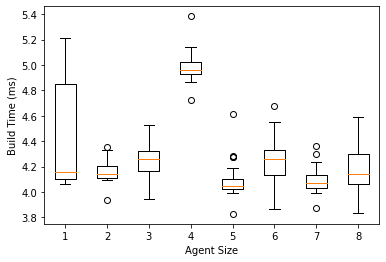

levene:
LeveneResult(statistic=9.389960920222121, pvalue=3.032852128376712e-10)
Anova or kruskal:
KruskalResult(statistic=117.25379120879916, pvalue=2.8570791975090577e-22)

*************** BUILD FOR 2000********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  4.265 &   4.688 &  4.726 &  5.339 &      0.417 \\
agent\_ms\_2 &  4.184 &   4.376 &  4.443 &  4.868 &      0.165 \\
agent\_ms\_3 &  4.243 &   4.671 &  4.620 &  5.097 &      0.190 \\
agent\_ms\_4 &  5.071 &   5.188 &  5.204 &  5.512 &      0.103 \\
agent\_ms\_5 &  4.026 &   4.360 &  4.616 &  6.021 &      0.552 \\
agent\_ms\_6 &  4.085 &   4.345 &  4.376 &  4.711 &      0.138 \\
agent\_ms\_7 &  4.047 &   4.300 &  4.333 &  4.662 &      0.135 \\
agent\_ms\_8 &  4.086 &   4.448 &  4.754 &  6.116 &      0.627 \\
\bottomrule
\end{tabular}



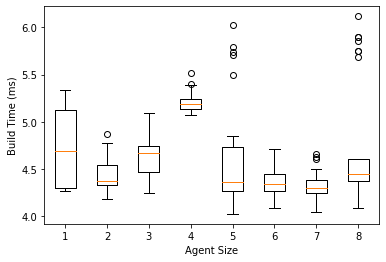

levene:
LeveneResult(statistic=7.908300069922883, pvalue=1.3377254996857173e-08)
Anova or kruskal:
KruskalResult(statistic=89.25291387361543, pvalue=1.7613086323773908e-16)

*************** BUILD FOR 2100********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  4.454 &   5.338 &  5.132 &  5.711 &      0.447 \\
agent\_ms\_2 &  4.493 &   4.554 &  4.584 &  4.832 &      0.084 \\
agent\_ms\_3 &  4.398 &   4.682 &  4.770 &  5.246 &      0.209 \\
agent\_ms\_4 &  5.404 &   5.494 &  5.535 &  6.057 &      0.132 \\
agent\_ms\_5 &  4.219 &   4.478 &  4.492 &  4.809 &      0.111 \\
agent\_ms\_6 &  4.388 &   4.623 &  4.654 &  5.105 &      0.178 \\
agent\_ms\_7 &  4.342 &   4.554 &  4.617 &  5.358 &      0.219 \\
agent\_ms\_8 &  4.248 &   4.619 &  4.664 &  5.192 &      0.193 \\
\bottomrule
\end{tabular}



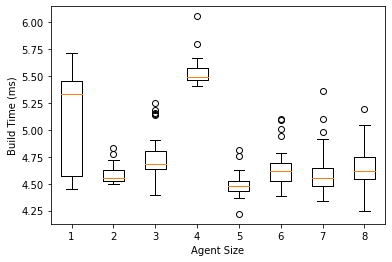

levene:
LeveneResult(statistic=8.913473410240556, pvalue=1.015958482225608e-09)
Anova or kruskal:
KruskalResult(statistic=123.34365118049884, pvalue=1.540208357792484e-23)

*************** BUILD FOR 2200********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  4.697 &   5.658 &  5.496 &  6.115 &      0.414 \\
agent\_ms\_2 &  4.641 &   4.796 &  4.826 &  5.105 &      0.107 \\
agent\_ms\_3 &  4.612 &   4.892 &  5.203 &  6.887 &      0.668 \\
agent\_ms\_4 &  5.368 &   5.664 &  5.685 &  5.913 &      0.101 \\
agent\_ms\_5 &  4.488 &   4.708 &  4.754 &  5.165 &      0.142 \\
agent\_ms\_6 &  4.463 &   4.815 &  4.850 &  5.554 &      0.180 \\
agent\_ms\_7 &  4.654 &   4.816 &  5.132 &  6.705 &      0.649 \\
agent\_ms\_8 &  4.551 &   4.854 &  4.889 &  5.492 &      0.176 \\
\bottomrule
\end{tabular}



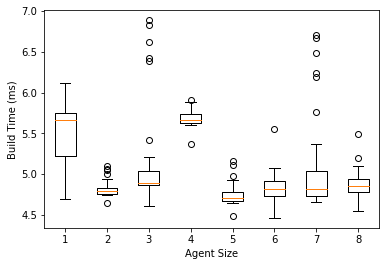

levene:
LeveneResult(statistic=4.804016961428672, pvalue=4.543806050546048e-05)
Anova or kruskal:
KruskalResult(statistic=109.26816162663121, pvalue=1.3024493186615668e-20)

*************** BUILD FOR 2300********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  5.105 &   6.018 &  5.985 &  6.230 &      0.195 \\
agent\_ms\_2 &  4.812 &   4.985 &  5.029 &  5.535 &      0.137 \\
agent\_ms\_3 &  4.823 &   5.153 &  5.286 &  6.131 &      0.304 \\
agent\_ms\_4 &  5.886 &   6.024 &  6.072 &  6.715 &      0.167 \\
agent\_ms\_5 &  4.664 &   4.936 &  4.957 &  5.282 &      0.119 \\
agent\_ms\_6 &  4.807 &   5.004 &  5.053 &  5.587 &      0.174 \\
agent\_ms\_7 &  4.792 &   4.986 &  5.061 &  6.291 &      0.287 \\
agent\_ms\_8 &  4.710 &   5.004 &  5.032 &  5.358 &      0.133 \\
\bottomrule
\end{tabular}



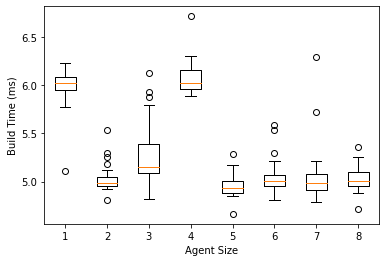

levene:
LeveneResult(statistic=1.9416576237869534, pvalue=0.06403552758066611)
Anova or kruskal:
F_onewayResult(statistic=154.08029863761374, pvalue=1.6511984793160533e-83)

*************** BUILD FOR 2400********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  5.145 &   6.093 &  6.048 &  6.411 &      0.311 \\
agent\_ms\_2 &  4.941 &   5.180 &  5.206 &  5.484 &      0.103 \\
agent\_ms\_3 &  5.270 &   5.371 &  5.446 &  6.001 &      0.184 \\
agent\_ms\_4 &  5.826 &   6.219 &  6.272 &  6.914 &      0.202 \\
agent\_ms\_5 &  4.823 &   5.170 &  5.195 &  6.001 &      0.192 \\
agent\_ms\_6 &  5.016 &   5.392 &  5.442 &  7.004 &      0.344 \\
agent\_ms\_7 &  5.404 &   6.931 &  6.882 &  7.357 &      0.334 \\
agent\_ms\_8 &  4.880 &   5.193 &  5.204 &  5.366 &      0.121 \\
\bottomrule
\end{tabular}



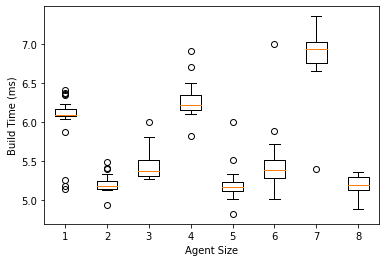

levene:
LeveneResult(statistic=1.5349423225057572, pvalue=0.15628711438798013)
Anova or kruskal:
F_onewayResult(statistic=201.48861727505258, pvalue=7.805897193817149e-95)

*************** BUILD FOR 2500********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  5.319 &   6.326 &  6.035 &  6.685 &      0.494 \\
agent\_ms\_2 &  5.076 &   5.400 &  5.433 &  5.744 &      0.136 \\
agent\_ms\_3 &  5.201 &   5.522 &  5.536 &  5.966 &      0.139 \\
agent\_ms\_4 &  6.171 &   6.523 &  6.545 &  6.947 &      0.149 \\
agent\_ms\_5 &  5.003 &   5.380 &  5.425 &  5.731 &      0.157 \\
agent\_ms\_6 &  5.145 &   5.445 &  5.459 &  5.784 &      0.136 \\
agent\_ms\_7 &  5.309 &   5.996 &  6.348 &  7.442 &      0.921 \\
agent\_ms\_8 &  5.073 &   5.571 &  5.575 &  6.369 &      0.258 \\
\bottomrule
\end{tabular}



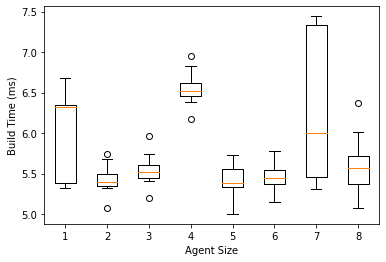

levene:
LeveneResult(statistic=40.10648125511395, pvalue=1.1416180240526778e-36)
Anova or kruskal:
KruskalResult(statistic=97.76686080057608, pvalue=3.1177391315589246e-18)

*************** BUILD FOR 2600********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  5.849 &   6.604 &  6.635 &  7.559 &      0.254 \\
agent\_ms\_2 &  5.577 &   5.720 &  5.817 &  6.846 &      0.276 \\
agent\_ms\_3 &  5.361 &   5.713 &  5.767 &  6.575 &      0.220 \\
agent\_ms\_4 &  6.361 &   6.748 &  6.789 &  7.432 &      0.189 \\
agent\_ms\_5 &  5.240 &   5.657 &  5.976 &  7.919 &      0.769 \\
agent\_ms\_6 &  5.213 &   5.659 &  5.739 &  6.598 &      0.306 \\
agent\_ms\_7 &  5.221 &   5.584 &  5.601 &  5.939 &      0.141 \\
agent\_ms\_8 &  5.537 &   5.754 &  5.771 &  6.125 &      0.160 \\
\bottomrule
\end{tabular}



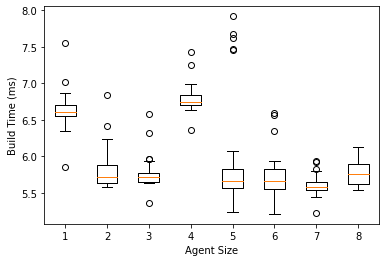

levene:
LeveneResult(statistic=3.9762207474668245, pvalue=0.00039881400480827216)
Anova or kruskal:
KruskalResult(statistic=131.0524491816721, pvalue=3.7880272385267493e-25)

*************** BUILD FOR 2700********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  5.708 &   6.822 &  6.672 &  7.072 &      0.393 \\
agent\_ms\_2 &  5.539 &   5.887 &  5.929 &  6.369 &      0.173 \\
agent\_ms\_3 &  5.672 &   5.994 &  6.030 &  6.424 &      0.150 \\
agent\_ms\_4 &  6.605 &   7.028 &  7.048 &  7.343 &      0.142 \\
agent\_ms\_5 &  5.507 &   5.806 &  5.853 &  6.498 &      0.205 \\
agent\_ms\_6 &  5.650 &   5.866 &  5.937 &  6.478 &      0.231 \\
agent\_ms\_7 &  5.423 &   5.858 &  5.874 &  6.455 &      0.173 \\
agent\_ms\_8 &  5.687 &   5.916 &  5.938 &  6.317 &      0.184 \\
\bottomrule
\end{tabular}



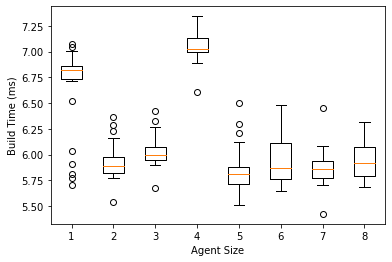

levene:
LeveneResult(statistic=2.0463941866711592, pvalue=0.050325813192600946)
Anova or kruskal:
F_onewayResult(statistic=123.7966415040676, pvalue=1.150873323680659e-74)

*************** BUILD FOR 2800********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  6.050 &   7.085 &  7.079 &  7.484 &      0.241 \\
agent\_ms\_2 &  5.764 &   6.114 &  6.201 &  6.888 &      0.238 \\
agent\_ms\_3 &  5.815 &   6.248 &  6.284 &  6.939 &      0.222 \\
agent\_ms\_4 &  6.768 &   7.364 &  7.396 &  8.078 &      0.276 \\
agent\_ms\_5 &  5.906 &   6.288 &  6.802 &  8.263 &      0.888 \\
agent\_ms\_6 &  5.745 &   6.126 &  6.135 &  6.396 &      0.139 \\
agent\_ms\_7 &  5.623 &   6.046 &  6.080 &  6.402 &      0.175 \\
agent\_ms\_8 &  5.868 &   6.140 &  6.156 &  6.545 &      0.169 \\
\bottomrule
\end{tabular}



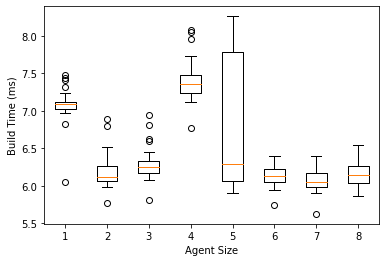

levene:
LeveneResult(statistic=13.622369338658608, pvalue=9.850854061175038e-15)
Anova or kruskal:
KruskalResult(statistic=126.47320283168308, pvalue=3.4258744543388334e-24)

*************** BUILD FOR 2900********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &    Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  6.336 &   7.457 &  7.398 &   8.387 &      0.447 \\
agent\_ms\_2 &  5.979 &   6.328 &  6.394 &   7.102 &      0.224 \\
agent\_ms\_3 &  6.012 &   6.400 &  6.437 &   6.941 &      0.162 \\
agent\_ms\_4 &  7.063 &   7.720 &  8.028 &  10.028 &      0.837 \\
agent\_ms\_5 &  6.091 &   6.396 &  6.621 &   8.348 &      0.648 \\
agent\_ms\_6 &  5.860 &   6.329 &  6.374 &   7.031 &      0.221 \\
agent\_ms\_7 &  6.004 &   6.284 &  6.309 &   6.980 &      0.187 \\
agent\_ms\_8 &  5.986 &   6.400 &  6.411 &   6.699 &      0.147 \\
\bottomrule
\end{tabular}



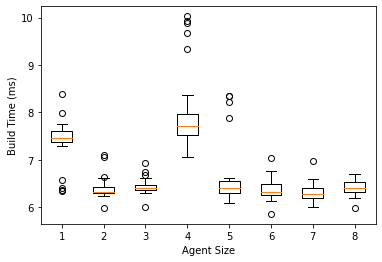

levene:
LeveneResult(statistic=4.484115033901662, pvalue=0.00010542633068351806)
Anova or kruskal:
KruskalResult(statistic=125.38942812349714, pvalue=5.7665441291804626e-24)

*************** BUILD FOR 3000********************
SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &    Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  7.089 &   7.588 &  7.638 &   8.211 &      0.212 \\
agent\_ms\_2 &  6.256 &   6.714 &  7.769 &  18.971 &      2.683 \\
agent\_ms\_3 &  6.231 &   6.642 &  7.145 &  17.592 &      2.042 \\
agent\_ms\_4 &  7.335 &   7.754 &  7.851 &   8.702 &      0.291 \\
agent\_ms\_5 &  6.328 &   6.950 &  7.320 &   9.044 &      0.914 \\
agent\_ms\_6 &  6.088 &   6.546 &  6.600 &   7.252 &      0.199 \\
agent\_ms\_7 &  6.089 &   6.459 &  6.475 &   6.906 &      0.171 \\
agent\_ms\_8 &  6.255 &   6.684 &  6.698 &   6.993 &      0.160 \\
\bottomrule
\end{tabular}



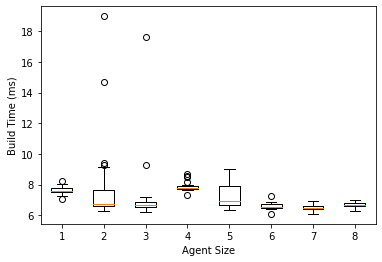

levene:
LeveneResult(statistic=3.2942215543496087, pvalue=0.0023291141732753044)
Anova or kruskal:
KruskalResult(statistic=125.77340676673538, pvalue=4.79515024695233e-24)


In [3]:
build_latency_data = pd.read_csv('./FinalDatasets/markov/markov-build-latency-allagents-100-3000.csv')

#All train sample sizes
for n in range(100, 3001, 100):
    print('\n*************** BUILD FOR ' + str(n) + '********************')
    build_latency_data_n = build_latency_data[build_latency_data['trains_samples'] == n]
    build_latency_data_n = build_latency_data_n.drop(columns=['trains_samples'])
    processData(build_latency_data_n, 'Agent Size', 'Build Time (ms)', 'figures/markov-buil-boxplot'+str(n)+'.pdf')

SIZE: 240
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &    Max. &  Std. Dev. \\
\midrule
100  &  0.291 &   0.632 &  0.649 &   1.263 &      0.259 \\
200  &  0.403 &   0.558 &  0.642 &   1.437 &      0.238 \\
300  &  0.604 &   0.648 &  0.689 &   1.012 &      0.083 \\
400  &  0.805 &   0.865 &  0.903 &   1.179 &      0.085 \\
500  &  1.000 &   1.076 &  1.117 &   1.437 &      0.099 \\
600  &  1.204 &   1.312 &  1.383 &   1.730 &      0.144 \\
700  &  1.393 &   1.515 &  1.562 &   2.782 &      0.142 \\
800  &  1.599 &   1.731 &  1.787 &   2.355 &      0.139 \\
900  &  1.805 &   1.956 &  2.075 &   2.830 &      0.247 \\
1000 &  2.008 &   2.173 &  2.242 &   2.942 &      0.179 \\
1100 &  2.238 &   2.418 &  2.525 &   3.283 &      0.219 \\
1200 &  2.391 &   2.635 &  2.743 &   3.284 &      0.225 \\
1300 &  2.602 &   2.872 &  3.009 &   3.744 &      0.259 \\
1400 &  2.836 &   3.100 &  3.227 &   4.048 &      0.275 \\
1500 &  3.004 &   3.304 &  3.579 &  11.667 &      0.984 \\
1600 &

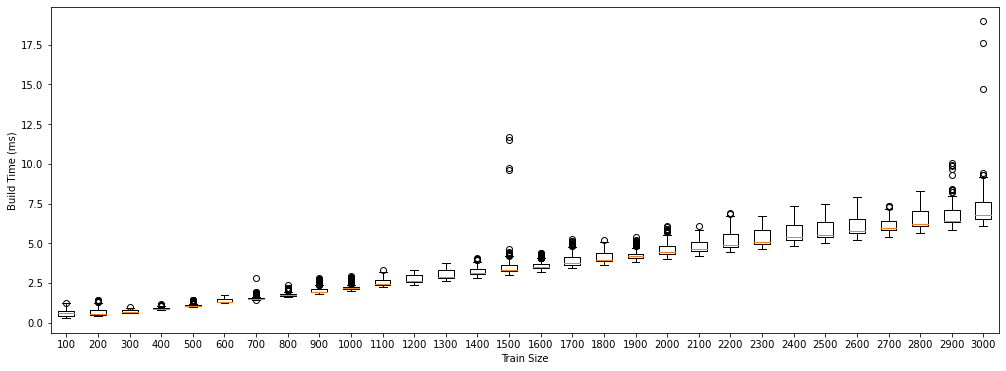

levene:
LeveneResult(statistic=30.82203949453527, pvalue=6.832333887069041e-159)
Anova or kruskal:
KruskalResult(statistic=6996.820973716536, pvalue=0.0)


In [40]:
# Analize all agents per train size.
def processData2(frametime_update_task, xlabel, ylabel, figfile):
    print("SIZE: " + str(frametime_update_task.shape[0]))
    
    descriptive_stats(frametime_update_task)

    boxdata = frametime_update_task.transpose().values.tolist()
    fig, ax = plt.subplots(figsize=(17, 6))
    ax.boxplot(boxdata)
    #ax.set_xticks(list(range(100, 3001, 100)))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(range(1, 31,1), range(100, 3001, 100))
    plt.savefig(figfile)
    plt.show()

    d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16, d17, d18, d19, d20, d21, d22, d23, d24, d25, d26, d27, d28, d29, d30 = x = frametime_update_task.transpose().values.tolist()
    levene_result = levene(d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16, d17, d18, d19, d20, d21, d22, d23, d24, d25, d26, d27, d28, d29, d30)
    print("levene:\n" + str(levene_result))
    if levene_result[1] < 0.05:
        anova_result = kruskal(d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16, d17, d18, d19, d20, d21, d22, d23, d24, d25, d26, d27, d28, d29, d30)
    else:
        anova_result = f_oneway(d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16, d17, d18, d19, d20, d21, d22, d23, d24, d25, d26, d27, d28, d29, d30)
    print("Anova or kruskal:\n" + str(anova_result))

trains_data = []
datarange = range(100, 3001, 100)
sizes = {}
counter = 0
for n in datarange:    
    sizes[counter] = n
    counter += 1
    build_latency_data_n = build_latency_data[build_latency_data['trains_samples'] == n]
    build_latency_data_n = build_latency_data_n.drop(columns=['trains_samples'])
    trains_data.append(build_latency_data_n.values.flatten())
    
trains_data_pd = pd.DataFrame(np.array(trains_data).transpose())
trains_data_pd = trains_data_pd.rename(columns = sizes)
processData2(trains_data_pd, 'Train Size', 'Build Time (ms)', 'figures/markov-trainsize-boxplot.pdf')



LinregressResult(slope=0.002305298322209862, intercept=0.02962496168582529, rvalue=0.9719486034205661, pvalue=0.0, stderr=6.575108937837398e-06)


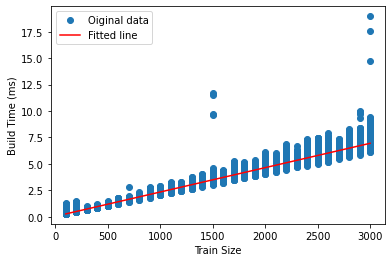

In [69]:
#Linear regression

build_latency_data_all = pd.DataFrame()
datarange = range(100, 3001, 100)
for n in datarange: 
    build_latency_data_n = build_latency_data[build_latency_data['trains_samples'] == n]  
    for i in range(1, 9):
        agent_i = pd.DataFrame(build_latency_data_n['agent_ms_' + str(i)]).assign(Group = n)
        agent_i = agent_i.rename(columns = {'agent_ms_' + str(i) : 'latency'})
        build_latency_data_all = pd.concat([build_latency_data_all, agent_i])
    
build_latency_data_all = pd.DataFrame(build_latency_data_all.values)

res = linregress(build_latency_data_all[1], build_latency_data_all[0])
print(res)

plt.plot(build_latency_data_all[1], build_latency_data_all[0], 'o', label='Oiginal data')
plt.plot(build_latency_data_all[1], res.intercept + res.slope*build_latency_data_all[1], 'r', label='Fitted line')
plt.legend()
plt.xlabel('Train Size')
plt.ylabel('Build Time (ms)')
plt.savefig('figures/markov-build-scatter-regression.pdf')
plt.show()

